# COVID-19 TimeAge


In [1]:
import pandas as pd

In [2]:
# 데이터 파일 불러오기
timeage_df = pd.read_csv("../Data/COVID-19/TimeAge.csv")

TimeAge.csv 파일의 구조를 살펴본다.

In [3]:
timeage_df.describe()

,time,confirmed,deceased
count,1089.0,1089.000000,1089.000000
mean,0.0,1158.129477,23.419651
std,0.0,822.619497,37.387911
min,0.0,32.000000,0.000000
25%,0.0,530.000000,0.000000
50%,0.0,1052.000000,3.000000
75%,0.0,1537.000000,35.000000
max,0.0,3362.000000,139.000000


In [4]:
timeage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       1089 non-null   object
 1   time       1089 non-null   int64 
 2   age        1089 non-null   object
 3   confirmed  1089 non-null   int64 
 4   deceased   1089 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 42.7+ KB


TimeAge.csv 파일의 age 데이터는 **연령대**를 의미한다.

In [19]:
# 연령대별 데이터 분리
timeage_0s_df = timeage_df[timeage_df["age"] == "0s"]
timeage_10s_df = timeage_df[timeage_df["age"] == "10s"]
timeage_20s_df = timeage_df[timeage_df["age"] == "20s"]
timeage_30s_df = timeage_df[timeage_df["age"] == "30s"]
timeage_40s_df = timeage_df[timeage_df["age"] == "40s"]
timeage_50s_df = timeage_df[timeage_df["age"] == "50s"]
timeage_60s_df = timeage_df[timeage_df["age"] == "60s"]
timeage_70s_df = timeage_df[timeage_df["age"] == "70s"]
timeage_80s_df = timeage_df[timeage_df["age"] == "80s"]

timeage_20s_df.head()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

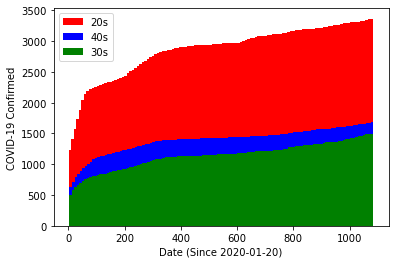

In [26]:
# 20대 날짜별 확진자 결과 추이 확인

import matplotlib.pyplot as plt

bins = timeage_20s_df["date"].count()
plt.hist(timeage_20s_df.index, bins=bins, weights=timeage_20s_df["confirmed"], label="20s", color="red")
plt.hist(timeage_40s_df.index, bins=bins, weights=timeage_40s_df["confirmed"], label="40s", color="blue")
plt.hist(timeage_30s_df.index, bins=bins, weights=timeage_30s_df["confirmed"], label="30s", color="green")
plt.legend(loc="upper left")
plt.xlabel("Date (Since 2020-01-20)")
plt.ylabel("COVID-19 Confirmed")
plt.show()

In [30]:
# 증가율 그래프 그리기

def confirmed_increment(data):
    data_list = data["confirmed"].tolist()
    iter_max = len(data_list) - 1

    increase_confirmed = list()

    for idx in range(iter_max):
        previous_confirmed = data_list[idx]
        current_confirmed = data_list[idx + 1]
        increase_confirmed.append(current_confirmed - previous_confirmed)

    # List to DataFrame
    increase_df = pd.DataFrame(
        {
            "increment": increase_confirmed
        }
    )

    return increase_df

time_20s_increment_df = confirmed_increment(timeage_20s_df)
time_30s_increment_df = confirmed_increment(timeage_30s_df)
time_40s_increment_df = confirmed_increment(timeage_40s_df)

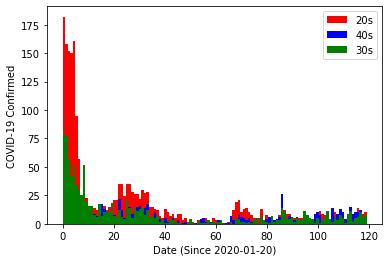

In [32]:
bins = time_20s_increment_df["increment"].count()
plt.hist(time_20s_increment_df.index, bins=bins, weights=time_20s_increment_df["increment"], label="20s", color="red")
plt.hist(time_30s_increment_df.index, bins=bins, weights=time_30s_increment_df["increment"], label="40s", color="blue")
plt.hist(time_40s_increment_df.index, bins=bins, weights=time_40s_increment_df["increment"], label="30s", color="green")
plt.legend(loc="upper right")
plt.xlabel("Date (Since 2020-01-20)")
plt.ylabel("COVID-19 Confirmed")
plt.show()